In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
pd.set_option('display.width',2000)
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/milk-cheese-and-eggs-prices/Milk cheese and eggs prices.csv


In [2]:
data = pd.read_csv('/kaggle/input/milk-cheese-and-eggs-prices/Milk cheese and eggs prices.csv')
data

,Countries,"Milk, cheese, and eggs prices, 2017",Global rank,Available data
0,South Korea,227.69,1,2017 - 2017
1,Liberia,213.25,2,2017 - 2017
2,Montserrat,209.46,3,2017 - 2017
3,Bahamas,204.57,4,2017 - 2017
4,C.A. Republic,197.98,5,2017 - 2017
...,...,...,...,...
162,Poland,67.68,163,2017 - 2017
163,Belarus,65.82,164,2017 - 2017
164,Ukraine,62.54,165,2017 - 2017
165,Egypt,60.89,166,2017 - 2017


In [3]:
data.groupby('Countries').size()

Countries
Albania        1
Algeria        1
Angola         1
Ant.& Barb.    1
Argentina      1
              ..
Ukraine        1
Uruguay        1
Vietnam        1
Zambia         1
Zimbabwe       1
Length: 167, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Countries                            167 non-null    object 
 1   Milk, cheese, and eggs prices, 2017  167 non-null    float64
 2   Global rank                          167 non-null    int64  
 3   Available data                       167 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.3+ KB


In [5]:
data.duplicated().sum()

0

In [6]:
data.isna().sum()

Countries                              0
Milk, cheese, and eggs prices, 2017    0
Global rank                            0
Available data                         0
dtype: int64

In [7]:
data.describe()

,"Milk, cheese, and eggs prices, 2017",Global rank
count,167.000000,167.00000
mean,116.792335,84.00000
std,34.164710,48.35287
min,55.910000,1.00000
25%,93.625000,42.50000
50%,107.890000,84.00000
75%,137.525000,125.50000
max,227.690000,167.00000


In [8]:
data.max()

Countries                                 Zimbabwe
Milk, cheese, and eggs prices, 2017         227.69
Global rank                                    167
Available data                         2017 - 2017
dtype: object

In [9]:
data.groupby('Milk, cheese, and eggs prices, 2017').max()

,Countries,Global rank,Available data
"Milk, cheese, and eggs prices, 2017",,,
55.91,Tunisia,167,2017 - 2017
60.89,Egypt,166,2017 - 2017
62.54,Ukraine,165,2017 - 2017
65.82,Belarus,164,2017 - 2017
67.68,Poland,163,2017 - 2017
...,...,...,...
197.98,C.A. Republic,5,2017 - 2017
204.57,Bahamas,4,2017 - 2017
209.46,Montserrat,3,2017 - 2017


In [10]:
data['Milk, cheese, and eggs prices, 2017'].mean()

116.79233532934131

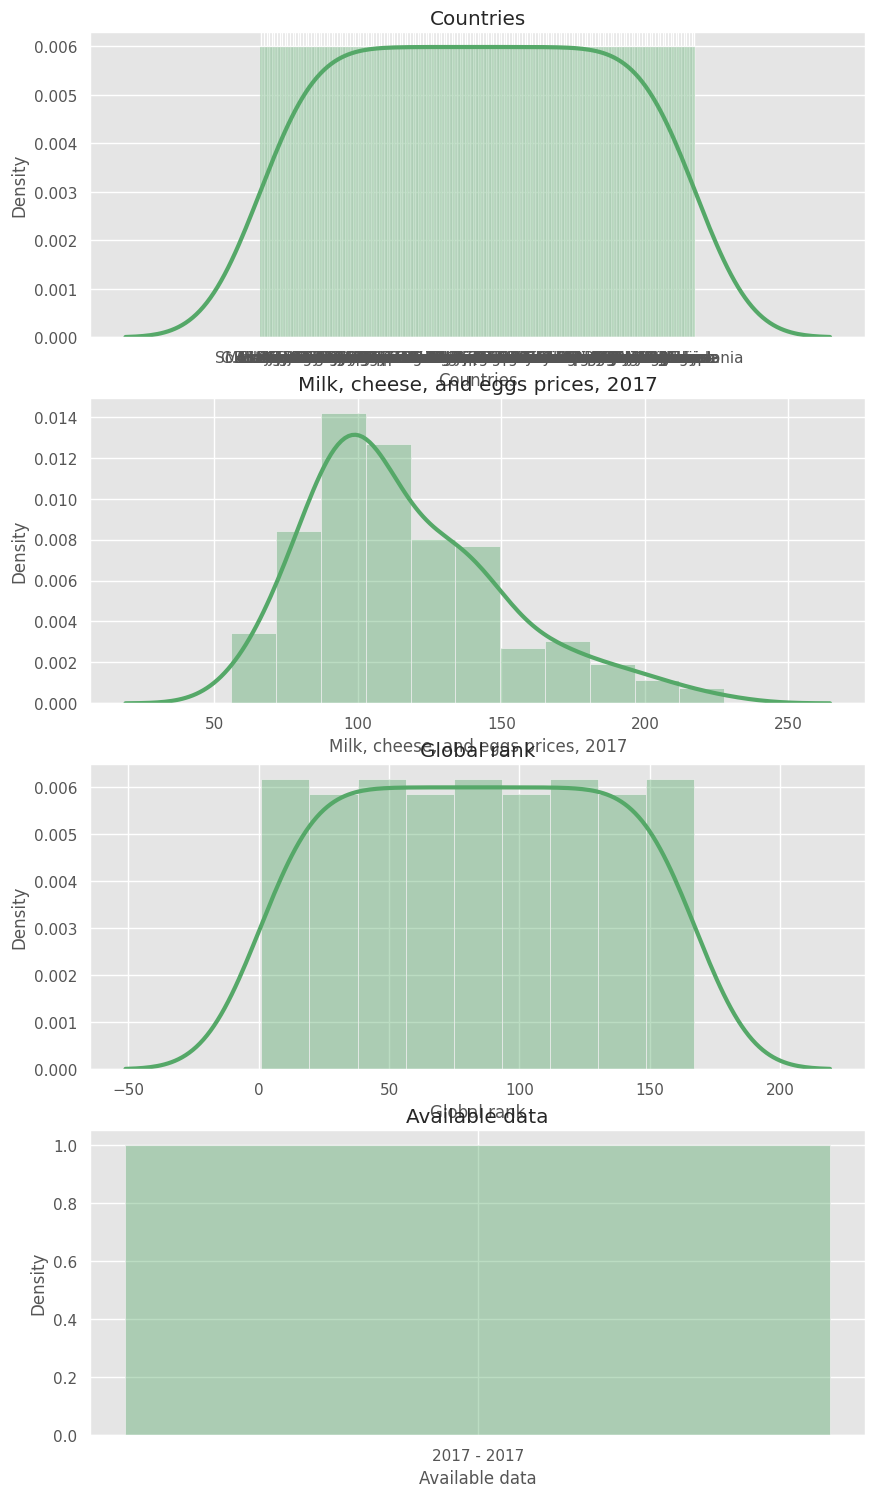

In [11]:
# creating the same in histplot as distplot is deprecated
plt.figure(figsize=(10,80))
for i in range(len(data.columns)):
    plt.subplot(17,1,i+1)
    sns.histplot(data[data.columns[i]],kde = True, stat = 'density',kde_kws = dict(cut = 3),edgecolor = None,color = 'g',alpha = 0.4, line_kws= { 'lw':3,'color':'blue'})
    plt.title(data.columns[i])
    
plt.tight_layout
plt.show()

In [12]:
data['Countries'].unique()

array(['South Korea', 'Liberia', 'Montserrat', 'Bahamas', 'C.A. Republic',
       'Bermuda', 'Israel', 'Ant.& Barb.', 'Hong Kong', 'Angola',
       'Saint Lucia', 'Japan', 'Norway', 'Jamaica', 'Comoros', 'Grenada',
       'Iceland', 'Djibouti', 'Uruguay', 'New Zealand', 'Tr.&Tobago',
       'Ghana', 'St. Vincent & ...', 'Aruba', 'Canada', 'China', 'Haiti',
       'Barbados', 'Dominica', 'Fiji', 'DR Congo', 'Benin',
       'S.T.&Principe', 'Australia', 'Argentina', 'Ivory Coast',
       'Cameroon', 'Guyana', 'Switzerland', 'Cyprus', 'Niger', 'Chile',
       'Mali', 'Costa Rica', 'Ethiopia', 'Guinea', 'Burkina Faso',
       'Singapore', 'Greece', 'Panama', 'Taiwan', 'Burundi', 'Rwanda',
       'Seychelles', 'UA Emirates', 'Senegal', 'Eq. Guinea', 'Luxembourg',
       'Maldives', 'R. of Congo', 'G.-Bissau', 'Ireland', 'Brazil',
       'Brunei', 'Chad', 'Gabon', 'Namibia', 'Domin. Rep.', 'Sweden',
       'Peru', 'Togo', 'Denmark', 'Belize', 'Malta', 'Italy', 'Finland',
       'Kuwait', 'Bo

In [13]:
data['Countries'].value_counts()

Countries
South Korea     1
Estonia         1
Malawi          1
Netherlands     1
Saudi Arabia    1
               ..
Luxembourg      1
Maldives        1
R. of Congo     1
G.-Bissau       1
Tunisia         1
Name: count, Length: 167, dtype: int64

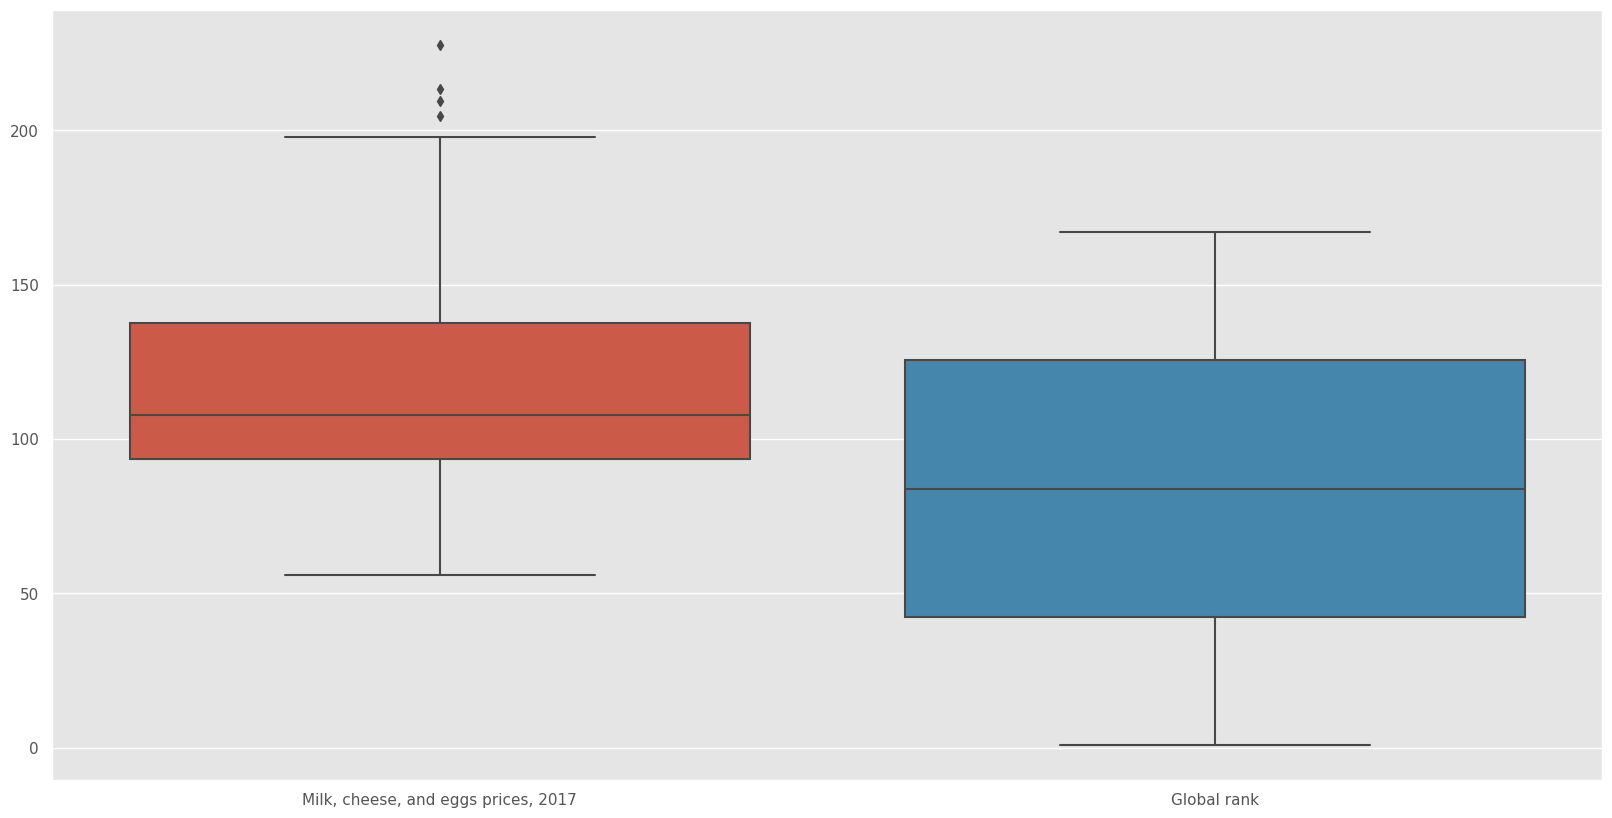

In [14]:
plt.figure(figsize = (20,10))
sns.boxplot(data)
plt.show()

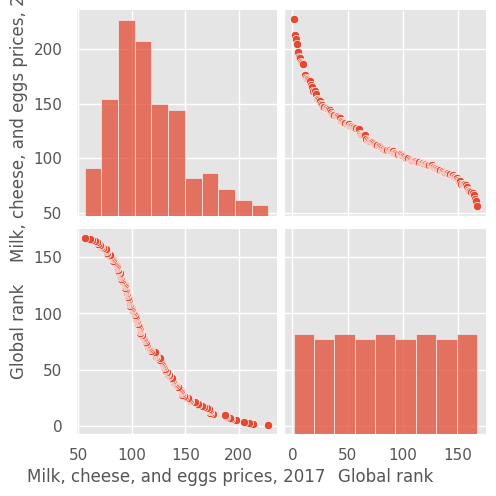

In [15]:
sns.pairplot(data)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
for columns in data.columns:
    if data[columns].dtypes == object:
        data[columns] = le.fit_transform(data[columns])
data
        

,Countries,"Milk, cheese, and eggs prices, 2017",Global rank,Available data
0,141,227.69,1,0
1,90,213.25,2,0
2,105,209.46,3,0
3,10,204.57,4,0
4,29,197.98,5,0
...,...,...,...,...
162,123,67.68,163,0
163,14,65.82,164,0
164,162,62.54,165,0
165,49,60.89,166,0


In [18]:
data.corr()

,Countries,"Milk, cheese, and eggs prices, 2017",Global rank,Available data
Countries,1.000000,-0.151880,0.149304,NaN
"Milk, cheese, and eggs prices, 2017",-0.151880,1.000000,-0.952833,NaN
Global rank,0.149304,-0.952833,1.000000,NaN
Available data,NaN,NaN,NaN,NaN


In [19]:
x = data.drop(["Available data"],axis = 1)
x

,Countries,"Milk, cheese, and eggs prices, 2017",Global rank
0,141,227.69,1
1,90,213.25,2
2,105,209.46,3
3,10,204.57,4
4,29,197.98,5
...,...,...,...
162,123,67.68,163
163,14,65.82,164
164,162,62.54,165
165,49,60.89,166


<Axes: >

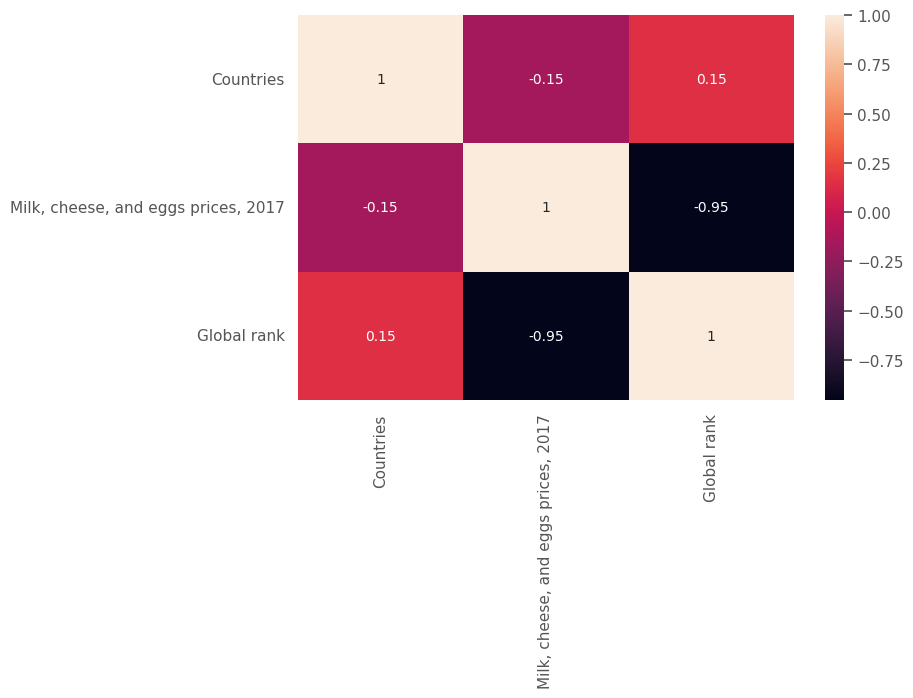

In [20]:
plt.figure(figsize = (8,5))
sns.heatmap(x.corr(),annot = True)

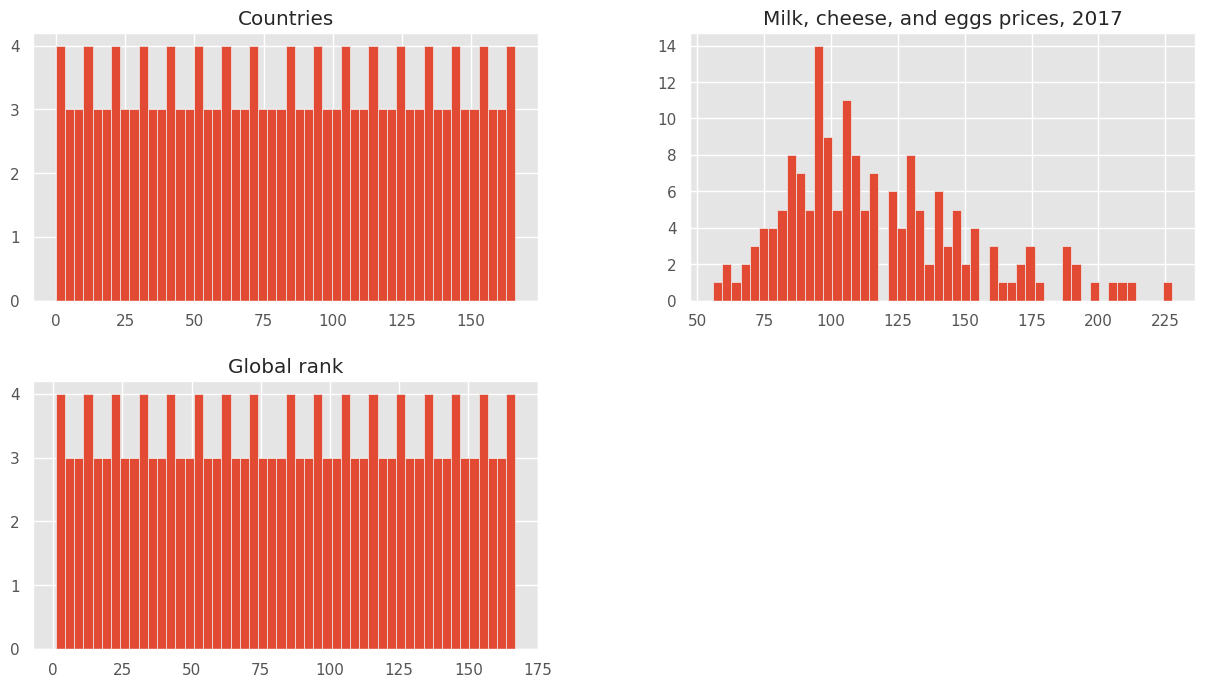

In [21]:
x.hist(bins = 50,figsize = (15,8))
plt.show()

In [22]:
sc = StandardScaler()
sc = sc.fit_transform(x)
sc


array([[ 1.20312273,  3.25573357, -1.72171011],
       [ 0.14520447,  2.83180406, -1.70096662],
       [ 0.4563569 ,  2.72053724, -1.68022312],
       [-1.51427516,  2.57697662, -1.65947963],
       [-1.12014875,  2.38350741, -1.63873613],
       [-1.3483272 ,  2.23671741, -1.61799264],
       [-0.12446097,  2.21264385, -1.59724914],
       [-1.65947963,  2.10431283, -1.57650565],
       [-0.29040893,  2.06585385, -1.55576215],
       [-1.68022312,  2.05381707, -1.53501866],
       [ 0.99568778,  1.74996178, -1.51427516],
       [-0.04148699,  1.6674658 , -1.49353166],
       [ 0.68453535,  1.65513544, -1.47278817],
       [-0.06223049,  1.64779594, -1.45204467],
       [-0.93345729,  1.6190251 , -1.43130118],
       [-0.39412641,  1.58144686, -1.41055768],
       [-0.24892194,  1.48779485, -1.38981419],
       [-0.78825282,  1.43377613, -1.36907069],
       [ 1.65947963,  1.33278461, -1.3483272 ],
       [ 0.58081787,  1.31311475, -1.3275837 ],
       [ 1.49353166,  1.23854543, -1.306

In [23]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5)
km.fit(sc)
km.cluster_centers_
print(km.labels_)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 3 3 3 3 3 3 3 3 3 2 3 3 3 3
 3 2 3 2 3 2 3 3 3 3 2 3 2 2 3 2 2 2 2 3 2 2 2 3 3 3 3 3 3 2 3 2 2 2 3 3 2
 3 3 2 3 3 2 2 2 3 2 2 2 1 2 1 2 2 1 1 1 4 4 4 4 1 4 4 4 4 1 4 1 4 4 4 4 1
 4 1 4 4 4 1 4 1 4 4 1 4 1 4 1 4 4 1 1 1 4 4 4 1 4 1 4 4 4 1 1 4 4 4 4 1 4
 4 1 4 1 4 4 4 4 4 1 1 1 4 1 4 1 4 1 4]


In [24]:

cluster = pd.concat([data,pd.DataFrame(km.labels_)],axis = 1)
cluster

,Countries,"Milk, cheese, and eggs prices, 2017",Global rank,Available data,0
0,141,227.69,1,0,0
1,90,213.25,2,0,0
2,105,209.46,3,0,0
3,10,204.57,4,0,0
4,29,197.98,5,0,0
...,...,...,...,...,...
162,123,67.68,163,0,4
163,14,65.82,164,0,1
164,162,62.54,165,0,4
165,49,60.89,166,0,1


In [25]:
print(type(km.labels_))
print(len(km.labels_))

<class 'numpy.ndarray'>
167


In [26]:
unique,counts = np.unique(km.labels_,return_counts= True)
print(dict(zip(unique,counts)))

{0: 20, 1: 31, 2: 32, 3: 37, 4: 47}


In [27]:
data['cluster'] = km.labels_

In [28]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++')
    kmeans.fit(sc)
    wcss.append(kmeans.inertia_)
wcss

[501.0,
 261.6455779330678,
 187.23799764858245,
 139.3492052477335,
 106.22822654326313,
 89.632298196492,
 74.4727755393721,
 65.09933485074035,
 55.34684280499516,
 50.92522128218492]

Text(0, 0.5, 'wcss')

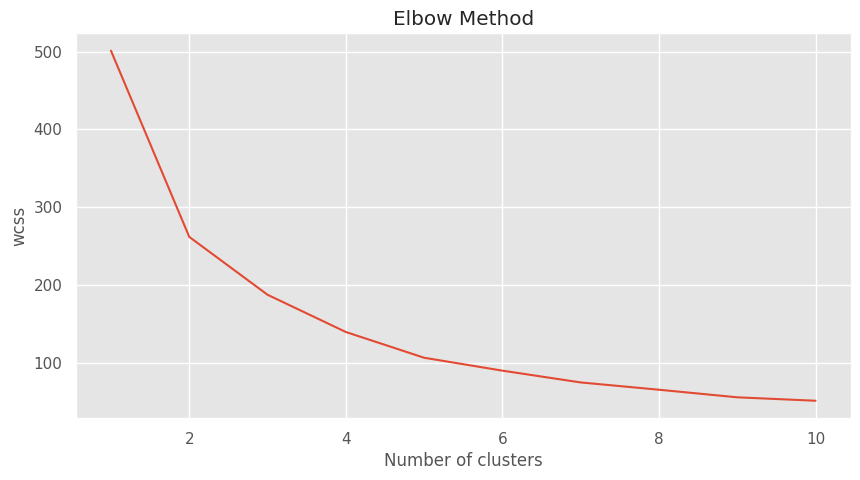

In [29]:
plt.figure(figsize = (10,5))
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

In [30]:
kmeans = KMeans(n_clusters = 5,init = 'k-means++')
kmeans = kmeans.fit(sc)
y_kmeans = kmeans.predict(sc)
y_kmeans

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1,
       1, 1, 1, 4, 1, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1,
       4, 1, 4, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4, 4, 4, 1, 4, 4, 4, 0, 4,
       0, 2, 4, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2], dtype=int32)

In [31]:
y_kmeans.shape

(167,)

In [32]:
sc.shape

(167, 3)

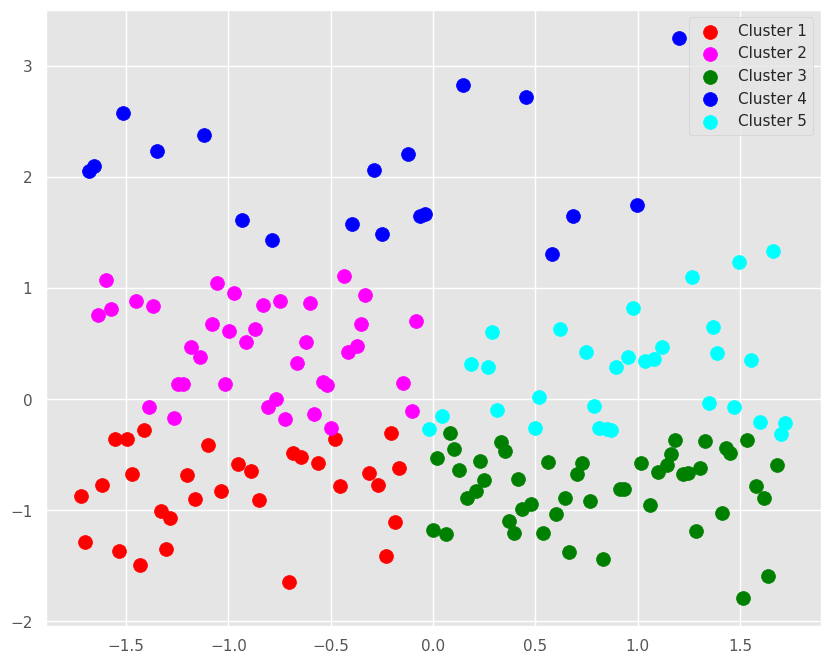

In [33]:
plt.figure(figsize=(10, 8))



# Scatterplot for Cluster 1
plt.scatter(sc[y_kmeans == 0, 0], sc[y_kmeans == 0, 1], s=100, c='red', label="Cluster 1")

# Scatterplot for Cluster 2
plt.scatter(sc[y_kmeans == 1, 0], sc[y_kmeans == 1, 1], s=100, c='magenta', label="Cluster 2")

# Scatterplot for Cluster 3
plt.scatter(sc[y_kmeans == 2, 0], sc[y_kmeans == 2, 1], s=100, c='green', label="Cluster 3")

# Scatterplot for Cluster 4
plt.scatter(sc[y_kmeans == 3, 0], sc[y_kmeans == 3, 1], s=100, c='blue', label="Cluster 4")

# Scatterplot for Cluster 5
plt.scatter(sc[y_kmeans == 4, 0], sc[y_kmeans == 4, 1], s=100, c='cyan', label="Cluster 5")
plt.legend()
plt.show()


In [34]:
sc

array([[ 1.20312273,  3.25573357, -1.72171011],
       [ 0.14520447,  2.83180406, -1.70096662],
       [ 0.4563569 ,  2.72053724, -1.68022312],
       [-1.51427516,  2.57697662, -1.65947963],
       [-1.12014875,  2.38350741, -1.63873613],
       [-1.3483272 ,  2.23671741, -1.61799264],
       [-0.12446097,  2.21264385, -1.59724914],
       [-1.65947963,  2.10431283, -1.57650565],
       [-0.29040893,  2.06585385, -1.55576215],
       [-1.68022312,  2.05381707, -1.53501866],
       [ 0.99568778,  1.74996178, -1.51427516],
       [-0.04148699,  1.6674658 , -1.49353166],
       [ 0.68453535,  1.65513544, -1.47278817],
       [-0.06223049,  1.64779594, -1.45204467],
       [-0.93345729,  1.6190251 , -1.43130118],
       [-0.39412641,  1.58144686, -1.41055768],
       [-0.24892194,  1.48779485, -1.38981419],
       [-0.78825282,  1.43377613, -1.36907069],
       [ 1.65947963,  1.33278461, -1.3483272 ],
       [ 0.58081787,  1.31311475, -1.3275837 ],
       [ 1.49353166,  1.23854543, -1.306

Text(0, 0.5, 'Global rank')

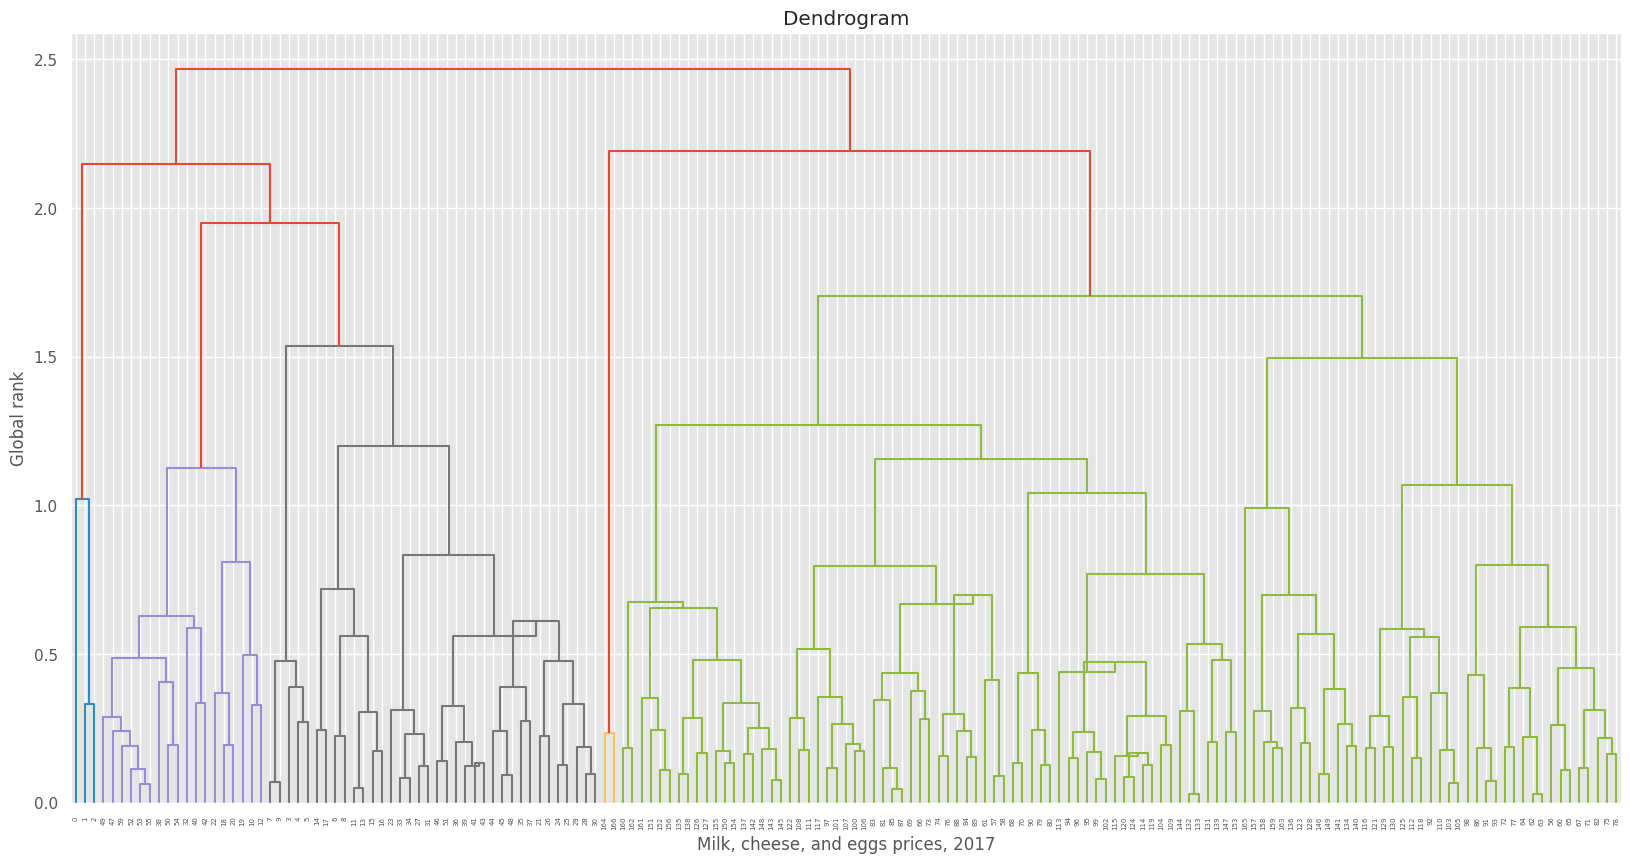

In [35]:
import scipy.cluster.hierarchy as sch
plt.rcParams['figure.figsize'] = (20,10)
dendrogram = sch.dendrogram(sch.linkage(sc,method = 'centroid'))
plt.title("Dendrogram")
plt.xlabel('Milk, cheese, and eggs prices, 2017')
plt.ylabel('Global rank')

Text(0, 0.5, 'Global rank')

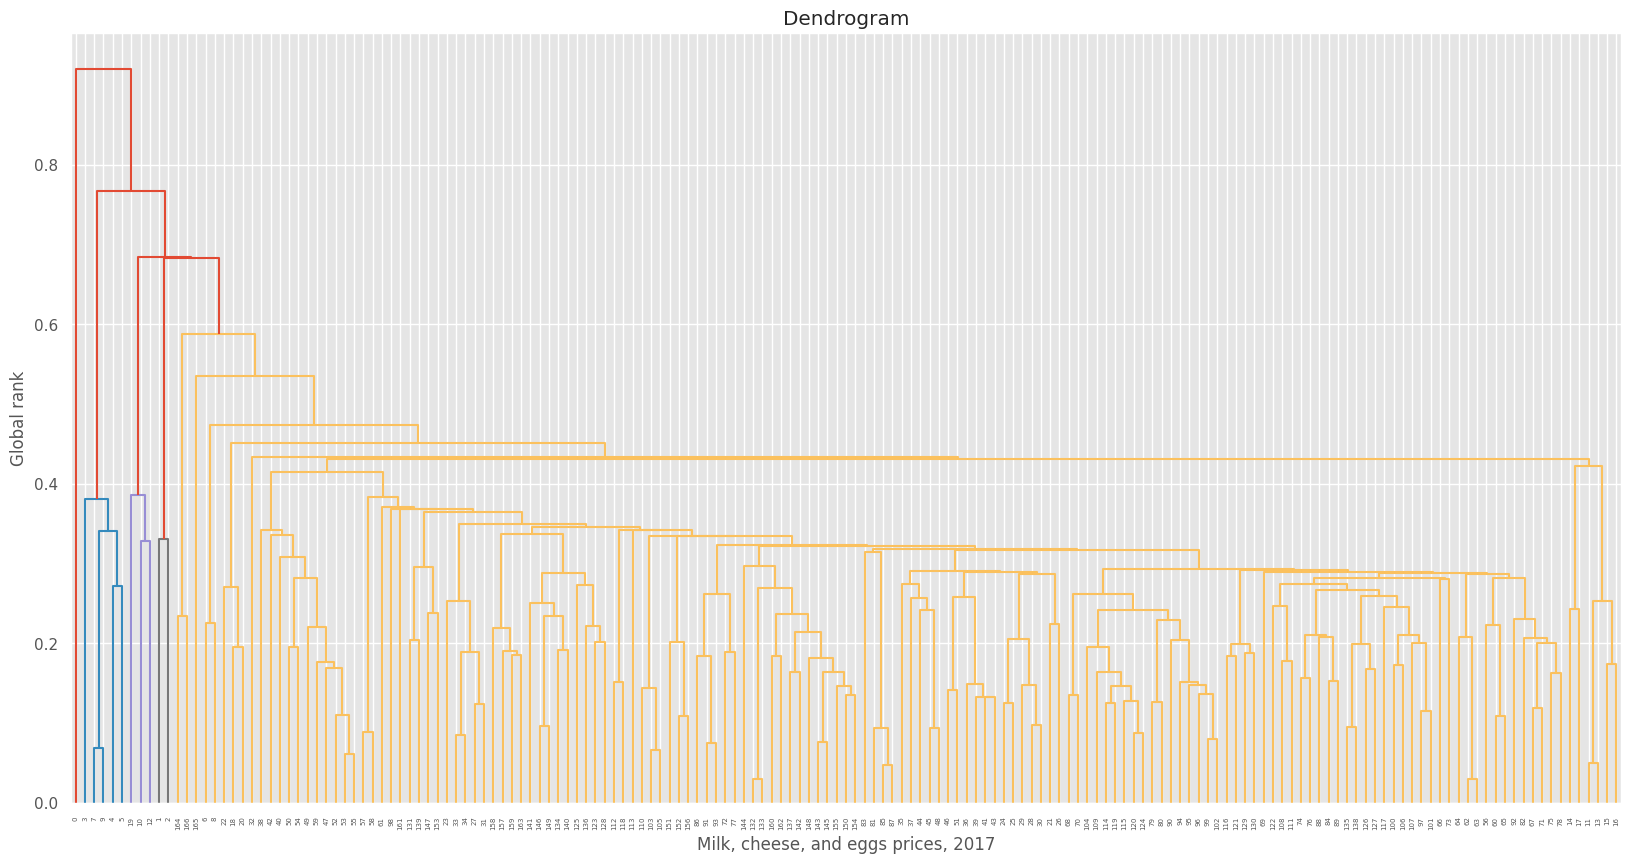

In [36]:
import scipy.cluster.hierarchy as sch
plt.rcParams['figure.figsize'] = (20,10)
dendrogram = sch.dendrogram(sch.linkage(sc,method = 'single'))
plt.title("Dendrogram")
plt.xlabel('Milk, cheese, and eggs prices, 2017')
plt.ylabel('Global rank')

Text(0, 0.5, 'Global rank')

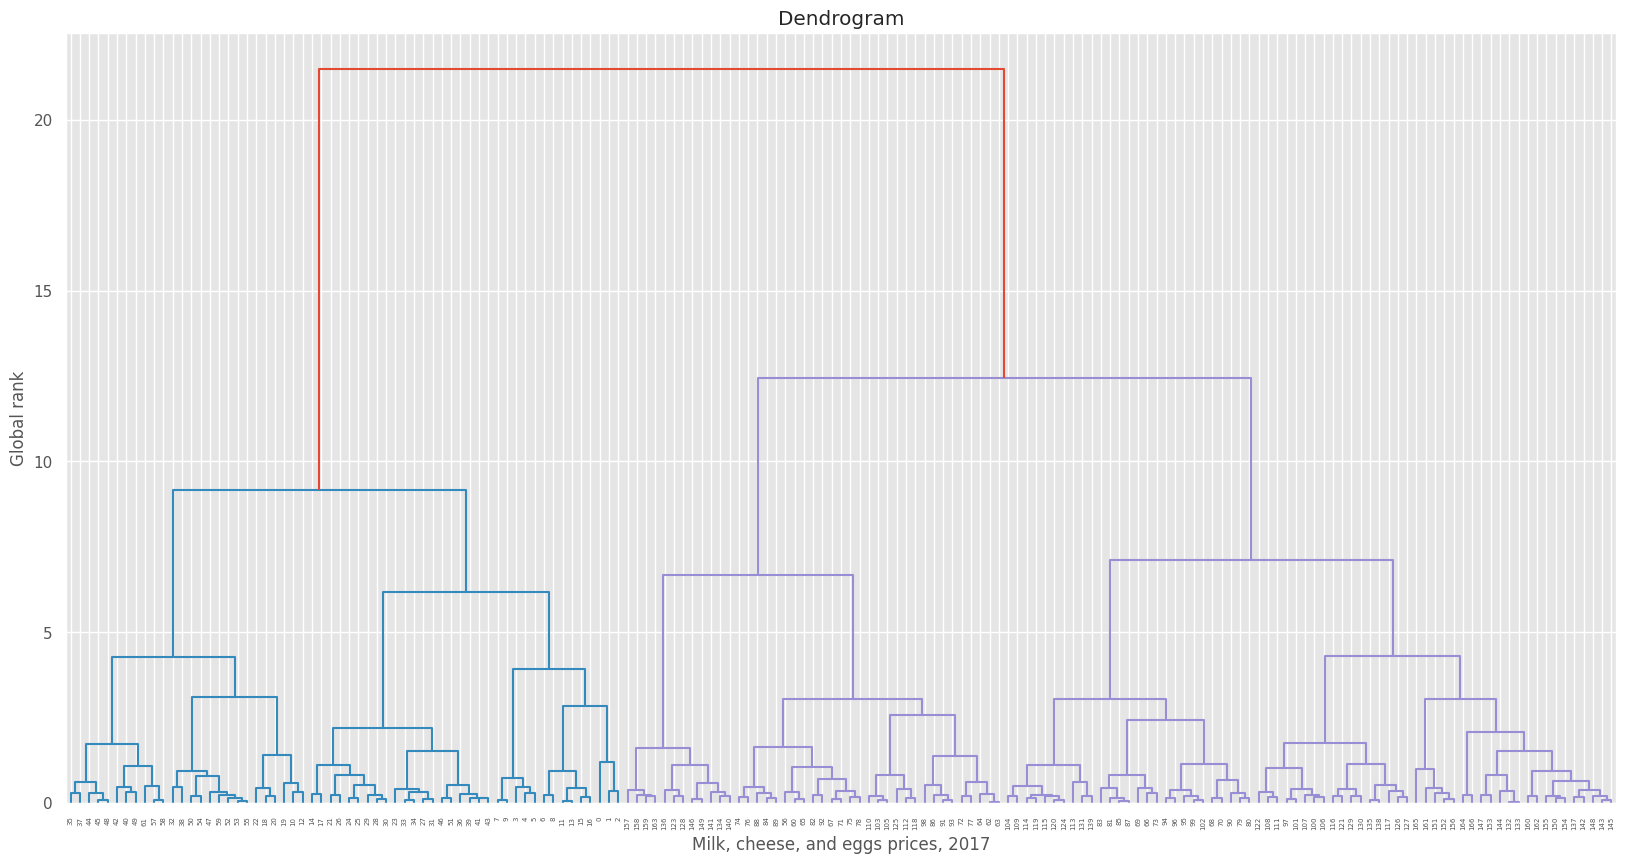

In [37]:
import scipy.cluster.hierarchy as sch
plt.rcParams['figure.figsize'] = (20,10)
dendrogram = sch.dendrogram(sch.linkage(sc,method = 'ward'))
plt.title("Dendrogram")
plt.xlabel('Milk, cheese, and eggs prices, 2017')
plt.ylabel('Global rank')

Text(0, 0.5, 'Global rank')

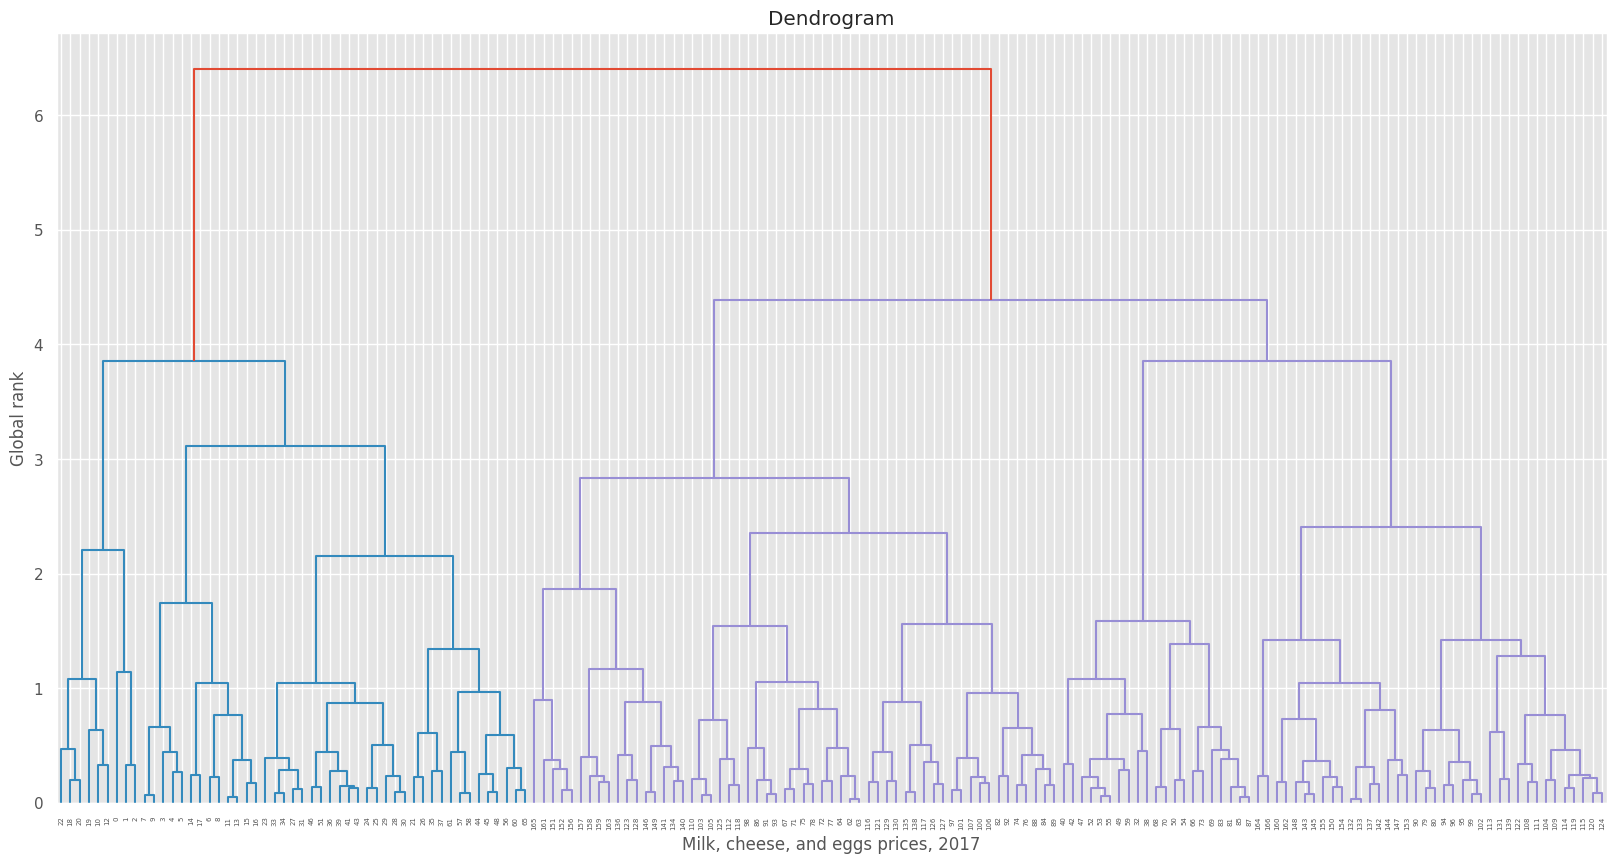

In [38]:
import scipy.cluster.hierarchy as sch
plt.rcParams['figure.figsize'] = (20,10)
dendrogram = sch.dendrogram(sch.linkage(sc,method = 'complete'))
plt.title("Dendrogram")
plt.xlabel('Milk, cheese, and eggs prices, 2017')
plt.ylabel('Global rank')

In [39]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean',linkage = 'single')
y_ac = ac.fit_predict(sc)
y_ac

array([3, 4, 4, 2, 2, 2, 0, 2, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
pd.DataFrame(y_ac).value_counts()

0    156
2      5
1      3
4      2
3      1
Name: count, dtype: int64

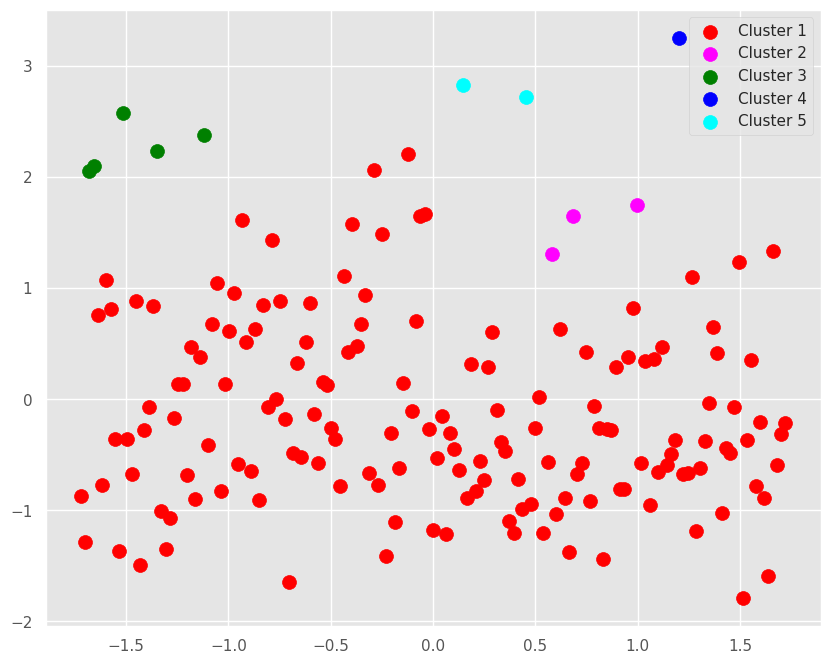

In [41]:
plt.figure(figsize=(10, 8))



# Scatterplot for Cluster 1
plt.scatter(sc[y_ac == 0, 0], sc[y_ac == 0, 1], s=100, c='red', label="Cluster 1")

# Scatterplot for Cluster 2
plt.scatter(sc[y_ac == 1, 0], sc[y_ac == 1, 1], s=100, c='magenta', label="Cluster 2")

# Scatterplot for Cluster 3
plt.scatter(sc[y_ac == 2, 0], sc[y_ac == 2, 1], s=100, c='green', label="Cluster 3")

# Scatterplot for Cluster 4
plt.scatter(sc[y_ac == 3, 0], sc[y_ac == 3, 1], s=100, c='blue', label="Cluster 4")

# Scatterplot for Cluster 5
plt.scatter(sc[y_ac == 4, 0], sc[y_ac == 4, 1], s=100, c='cyan', label="Cluster 5")
plt.legend()
plt.show()



In [42]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean',linkage = 'ward')
y_ac = ac.fit_predict(sc)
y_ac

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0,
       4, 0, 4, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 4, 4, 4, 0, 4, 0, 4, 0, 4,
       0, 0, 4, 0, 0, 0, 4, 4, 4, 2, 0, 4, 2, 2, 4, 0, 4, 0, 2, 2, 2, 4,
       0, 2, 0, 4, 4, 4, 2, 2, 0, 4, 4, 2, 2, 0, 4, 0, 2, 2, 0, 2, 2, 4,
       2, 2, 0, 2, 0, 2, 2, 4, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2])

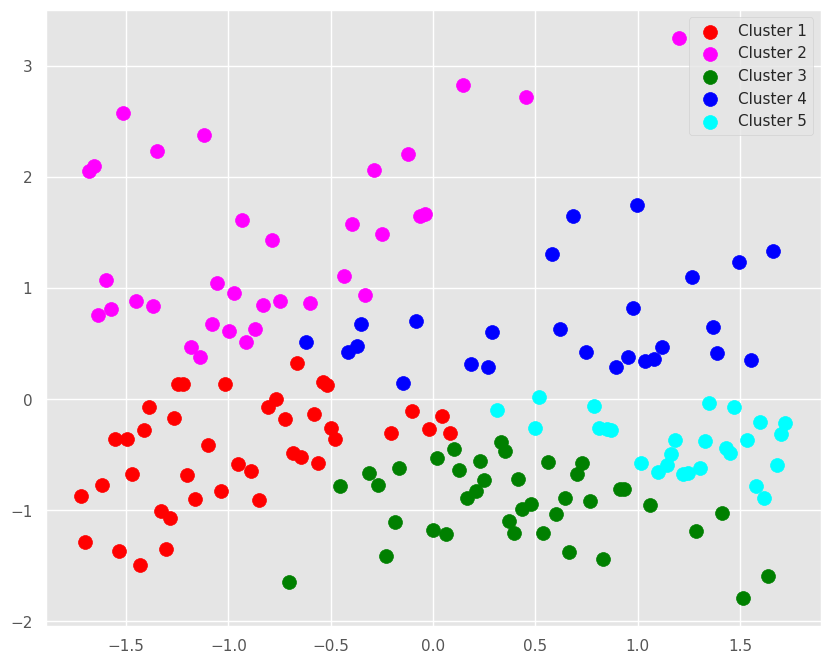

In [43]:
plt.figure(figsize=(10, 8))



# Scatterplot for Cluster 1
plt.scatter(sc[y_ac == 0, 0], sc[y_ac == 0, 1], s=100, c='red', label="Cluster 1")

# Scatterplot for Cluster 2
plt.scatter(sc[y_ac == 1, 0], sc[y_ac == 1, 1], s=100, c='magenta', label="Cluster 2")

# Scatterplot for Cluster 3
plt.scatter(sc[y_ac == 2, 0], sc[y_ac == 2, 1], s=100, c='green', label="Cluster 3")

# Scatterplot for Cluster 4
plt.scatter(sc[y_ac == 3, 0], sc[y_ac == 3, 1], s=100, c='blue', label="Cluster 4")

# Scatterplot for Cluster 5
plt.scatter(sc[y_ac == 4, 0], sc[y_ac == 4, 1], s=100, c='cyan', label="Cluster 5")
plt.legend()
plt.show()


In [44]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean',linkage = 'average')
y_ac = ac.fit_predict(sc)
y_ac

array([4, 4, 4, 3, 3, 3, 2, 3, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

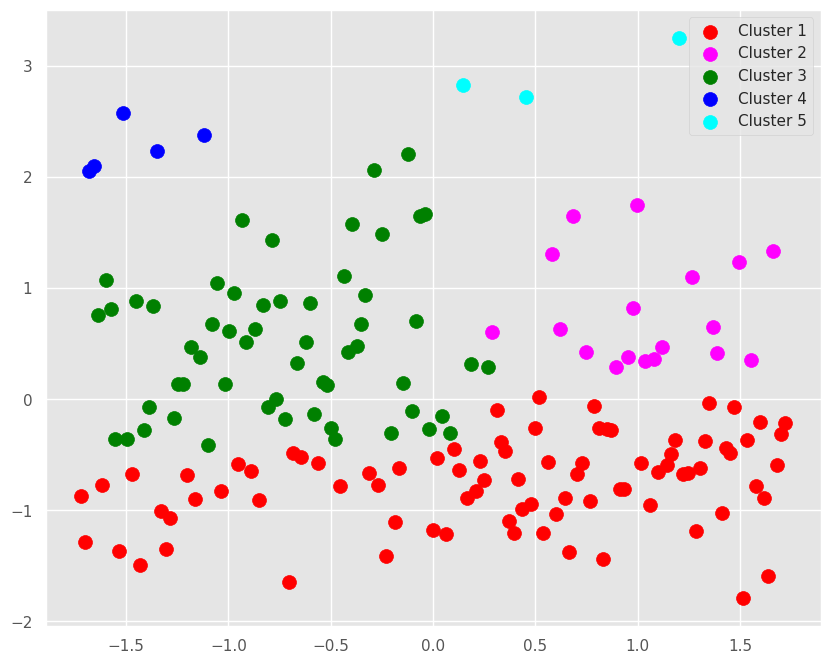

In [45]:
plt.figure(figsize=(10, 8))



# Scatterplot for Cluster 1
plt.scatter(sc[y_ac == 0, 0], sc[y_ac == 0, 1], s=100, c='red', label="Cluster 1")

# Scatterplot for Cluster 2
plt.scatter(sc[y_ac == 1, 0], sc[y_ac == 1, 1], s=100, c='magenta', label="Cluster 2")

# Scatterplot for Cluster 3
plt.scatter(sc[y_ac == 2, 0], sc[y_ac == 2, 1], s=100, c='green', label="Cluster 3")

# Scatterplot for Cluster 4
plt.scatter(sc[y_ac == 3, 0], sc[y_ac == 3, 1], s=100, c='blue', label="Cluster 4")

# Scatterplot for Cluster 5
plt.scatter(sc[y_ac == 4, 0], sc[y_ac == 4, 1], s=100, c='cyan', label="Cluster 5")
plt.legend()
plt.show()


In [46]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean',linkage = 'complete')
y_ac = ac.fit_predict(sc)
y_ac

array([3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0,
       0, 0, 0, 4, 0, 4, 4, 0, 4, 4, 4, 4, 0, 0, 0, 4, 0, 0, 2, 2, 2, 0,
       4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 1, 1, 4, 2, 4, 2, 4, 2, 4,
       2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1])

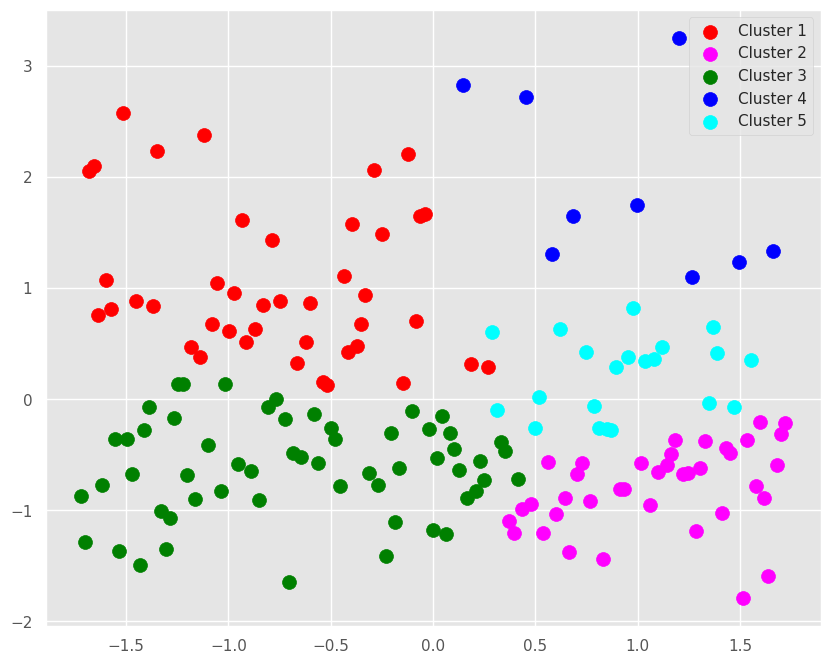

In [47]:
plt.figure(figsize=(10, 8))



# Scatterplot for Cluster 1
plt.scatter(sc[y_ac == 0, 0], sc[y_ac == 0, 1], s=100, c='red', label="Cluster 1")

# Scatterplot for Cluster 2
plt.scatter(sc[y_ac == 1, 0], sc[y_ac == 1, 1], s=100, c='magenta', label="Cluster 2")

# Scatterplot for Cluster 3
plt.scatter(sc[y_ac == 2, 0], sc[y_ac == 2, 1], s=100, c='green', label="Cluster 3")

# Scatterplot for Cluster 4
plt.scatter(sc[y_ac == 3, 0], sc[y_ac == 3, 1], s=100, c='blue', label="Cluster 4")

# Scatterplot for Cluster 5
plt.scatter(sc[y_ac == 4, 0], sc[y_ac == 4, 1], s=100, c='cyan', label="Cluster 5")
plt.legend()
plt.show()



In [48]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 6,affinity = 'euclidean',linkage = 'complete')
y_ac = ac.fit_predict(sc)
y_ac

array([3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 3, 5, 3, 5, 5, 5, 5, 5, 3, 3, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2,
       2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 2, 0, 0, 0, 2,
       4, 0, 4, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 1, 1, 4, 0, 4, 0, 4, 0, 4,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1])

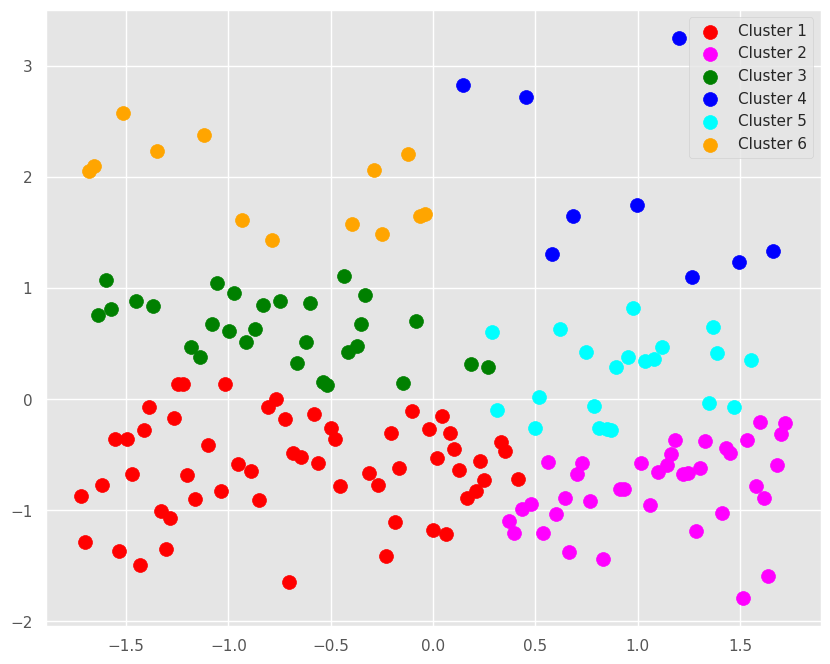

In [49]:
plt.figure(figsize=(10, 8))



# Scatterplot for Cluster 1
plt.scatter(sc[y_ac == 0, 0], sc[y_ac == 0, 1], s=100, c='red', label="Cluster 1")

# Scatterplot for Cluster 2
plt.scatter(sc[y_ac == 1, 0], sc[y_ac == 1, 1], s=100, c='magenta', label="Cluster 2")

# Scatterplot for Cluster 3
plt.scatter(sc[y_ac == 2, 0], sc[y_ac == 2, 1], s=100, c='green', label="Cluster 3")

# Scatterplot for Cluster 4
plt.scatter(sc[y_ac == 3, 0], sc[y_ac == 3, 1], s=100, c='blue', label="Cluster 4")

# Scatterplot for Cluster 5
plt.scatter(sc[y_ac == 4, 0], sc[y_ac == 4, 1], s=100, c='cyan', label="Cluster 5")

# Scatterplot for Cluster 6
plt.scatter(sc[y_ac == 5, 0], sc[y_ac == 5, 1], s=100, c='orange', label="Cluster 6")
plt.legend()

plt.show()


In [50]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 4,affinity = 'euclidean',linkage = 'complete')
y_ac = ac.fit_predict(sc)
y_ac

array([3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0])

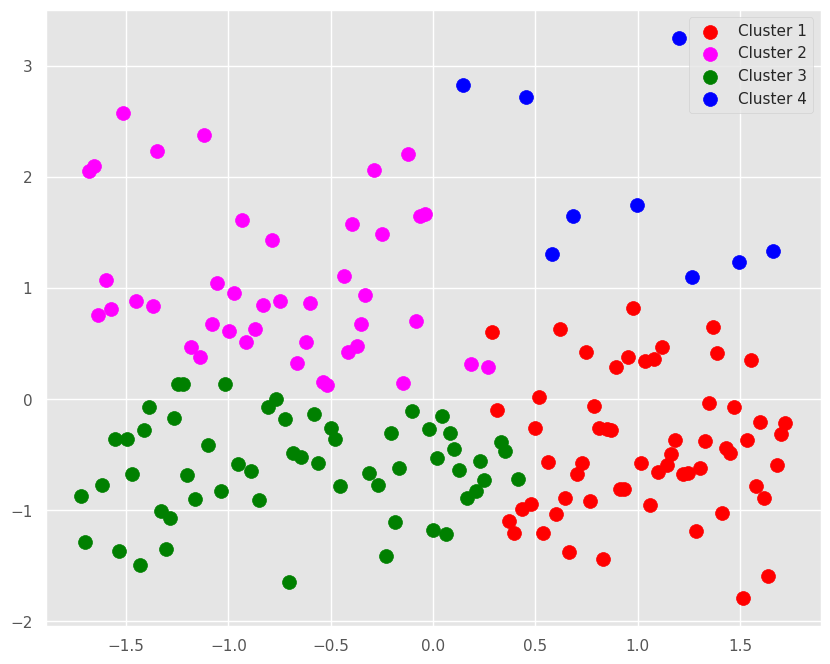

In [51]:
plt.figure(figsize=(10, 8))



# Scatterplot for Cluster 1
plt.scatter(sc[y_ac == 0, 0], sc[y_ac == 0, 1], s=100, c='red', label="Cluster 1")

# Scatterplot for Cluster 2
plt.scatter(sc[y_ac == 1, 0], sc[y_ac == 1, 1], s=100, c='magenta', label="Cluster 2")

# Scatterplot for Cluster 3
plt.scatter(sc[y_ac == 2, 0], sc[y_ac == 2, 1], s=100, c='green', label="Cluster 3")

# Scatterplot for Cluster 4
plt.scatter(sc[y_ac == 3, 0], sc[y_ac == 3, 1], s=100, c='blue', label="Cluster 4")


plt.legend()

plt.show()


In [52]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 8,affinity = 'euclidean',linkage = 'complete')
y_ac = ac.fit_predict(sc)
y_ac

array([1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 1, 5, 1, 5, 5, 5, 5, 5, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2,
       2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 2, 0, 0, 0, 2,
       4, 0, 4, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 3, 3, 4, 0, 4, 0, 4, 0, 4,
       0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 3,
       0, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 6, 3, 0, 0, 0, 6, 0, 0, 3,
       7, 7, 6, 0, 6, 7, 0, 3, 6, 6, 7, 7, 7, 7, 6, 7, 7, 6, 7, 6, 6, 7,
       7, 7, 6, 6, 6, 6, 7, 6, 7, 6, 7, 6, 7])

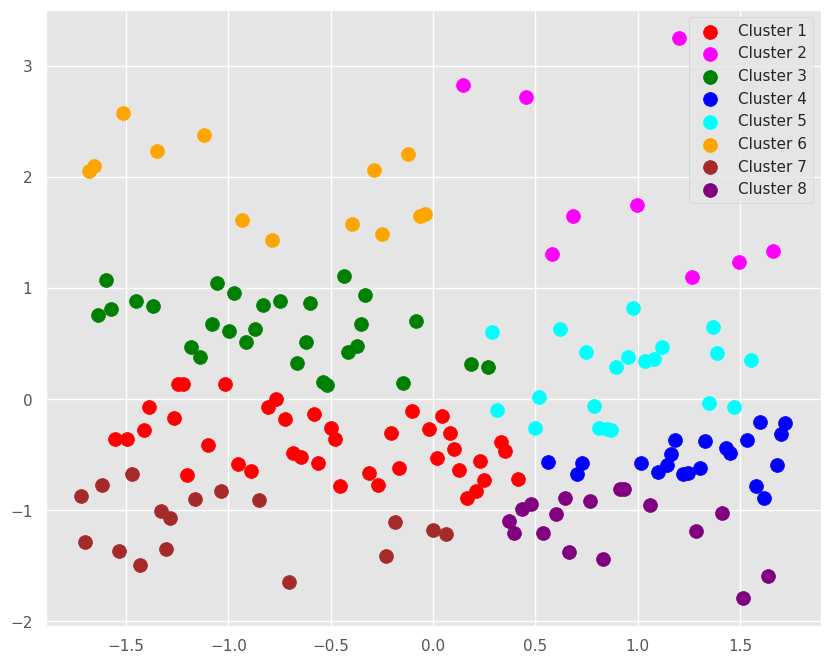

In [53]:
plt.figure(figsize=(10, 8))



# Scatterplot for Cluster 1
plt.scatter(sc[y_ac == 0, 0], sc[y_ac == 0, 1], s=100, c='red', label="Cluster 1")

# Scatterplot for Cluster 2
plt.scatter(sc[y_ac == 1, 0], sc[y_ac == 1, 1], s=100, c='magenta', label="Cluster 2")

# Scatterplot for Cluster 3
plt.scatter(sc[y_ac == 2, 0], sc[y_ac == 2, 1], s=100, c='green', label="Cluster 3")

# Scatterplot for Cluster 4
plt.scatter(sc[y_ac == 3, 0], sc[y_ac == 3, 1], s=100, c='blue', label="Cluster 4")

# Scatterplot for Cluster 5
plt.scatter(sc[y_ac == 4, 0], sc[y_ac == 4, 1], s=100, c='cyan', label="Cluster 5")

# Scatterplot for Cluster 6
plt.scatter(sc[y_ac == 5, 0], sc[y_ac == 5, 1], s=100, c='orange', label="Cluster 6")

# Scatterplot for Cluster 7
plt.scatter(sc[y_ac == 6, 0], sc[y_ac == 6, 1], s=100, c='brown', label="Cluster 7")

# Scatterplot for Cluster 8
plt.scatter(sc[y_ac == 7, 0], sc[y_ac == 7, 1], s=100, c='purple', label="Cluster 8")
plt.legend()

plt.show()
